### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [1]:
# a)
import random

def biased_dice():
    # Define the probabilities for each face of the dice
    probabilities = [1, 2, 3, 4, 5, 6, 7, 8]
    # Calculate the total weight of all the probabilities
    total_weight = sum(probabilities)
    # Keep rolling the dice until a face is selected
    while True:
        # Randomly select a face of the dice, weighted by its probability
        face = random.choices(range(1, 9), weights=probabilities, k=1)[0]
        # Yield the selected face
        yield face

# create dice generator
dice_gen = biased_dice()
# call dice generator
roll_dice = next(dice_gen)
roll_dice

6

(array([ 295.,  531.,  813.,    0., 1152., 1384.,    0., 1693., 1976.,
        2156.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

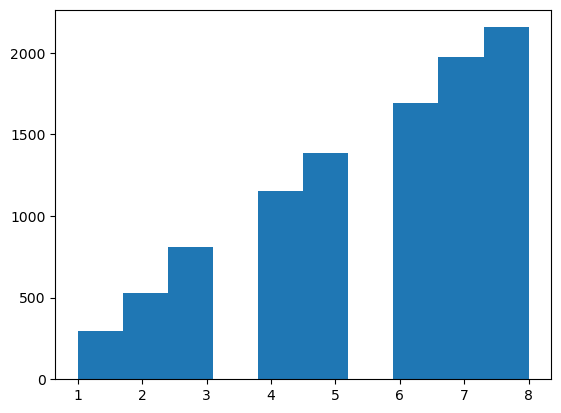

In [2]:
# b)
import matplotlib.pyplot as plt
import numpy as np
# Create list for dice values
dice_list = []

# Roll dice 10000 times
for i in range(10000):
    # Store value of dice tolls in value
    value = next(dice_gen)
    # Append value to dace_list
    dice_list.append(value)

# plot histogram of 10000 dice rolls
plt.hist(dice_list)

In [10]:
# c)
import random
import time

# Create dictionary for values
dice_dic = {}

# While not all faces have been yielded
def dice_timer():
    # Store time when function begins
    now = time.time()
    # Yield new numbers as long as not all faces are rolled
    while len(dice_dic) < 8:
        # Store value of dice tolls in value
        value = next(dice_gen)
        
        # Store values in dice_dic
        if value not in dice_dic:
            dice_dic[value] = 1
        else:
            dice_dic[value] += 1
    print(dice_dic)
    # Return passed time since start of function
    return (time.time() - now)
      
print("How long did it take?", dice_timer(), "seconds")

{7: 50, 6: 30, 4: 21, 5: 42, 8: 52, 2: 14, 3: 16, 1: 1}
How long did it take? 0.0009877681732177734 seconds


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [71]:
import time

class Elevator:
    def __init__(self, num_floors):
        self.num_floors = num_floors
        self.current_floor = 1
        self.direction = "up"
        self.destinations = []
        self.collect = []
        self.stops = [0] * num_floors
        self.users = {}
        self.users_in_elevator = {}
        self.time = 0
    
    # The call_elevator method adds a floor to the collect list when called from a floor to call the elevator
    def call_elevator(self, floor):
        if floor < 1 or floor > self.num_floors:
            print("Error: Invalid floor")
            return
        self.collect.append(floor)
    
    # The select_floor method adds a floor to the destinations list along with user data
    def select_floor(self, user_id, floor):
        if floor < 1 or floor > self.num_floors:
            print("Error: Invalid floor")
            return
        self.destinations.append(floor)
        self.users[user_id] = {"destination": floor, "current_floor": self.current_floor}
    
    # The move method controls the movement of the elevator, stopping at floors where it has been called or where there are selected floors to go to.
    def move(self):
        while self.collect:
            if self.current_floor in self.collect:
                while self.current_floor in self.collect:
                    self.collect.remove(self.current_floor)
                self.stops[self.current_floor-1] += 1
                self.open_doors_2()
                return
            if self.direction == "up":
                self.current_floor += 1
            else:
                self.current_floor -= 1
            if self.current_floor == 1:
                self.direction = "up"
            elif self.current_floor == self.num_floors:
                self.direction = "down"
            time.sleep(5)
            self.time += 5
                
        if not self.destinations:
            return
        if self.current_floor in self.destinations:
            while self.current_floor in self.destinations:
                self.destinations.remove(self.current_floor)
            self.stops[self.current_floor-1] += 1
            self.open_doors()
            return
        if self.direction == "up":
            self.current_floor += 1
        else:
            self.current_floor -= 1
        if self.current_floor == 1:
            self.direction = "up"
        elif self.current_floor == self.num_floors:
            self.direction = "down"
        time.sleep(5)
        self.time += 5       

    # The open_doors and open_doors_2 methods simulate the opening of the elevator doors, allowing users to enter or exit the elevator
    def open_doors(self):
        print("Ding! Doors opening on floor", self.current_floor)
        self.remove_users_at_destination()
        time.sleep(10)
        self.time += 10
        print("Doors closing")
        
    def open_doors_2(self):
        print("Ding! Doors opening on floor", self.current_floor)
        self.collect_users()
        time.sleep(10)
        self.time += 10
        print("Doors closing")
    
    # The collect_users method collects users waiting on the current floor and adds them to the elevator
    def collect_users(self):
        waiting_users = [user_id for user_id, user_data in self.users.items() if user_data["current_floor"] == self.current_floor]
        for user_id in waiting_users:
            print("User", user_id, "has entered the elevator on floor", self.current_floor)
            self.users_in_elevator[user_id] = self.users[user_id]
            del self.users[user_id]
    
    # The remove_users_at_destination method removes users from the elevator who have arrived at their destination floor
    def remove_users_at_destination(self):
        users_at_destination = [user_id for user_id, user_data in self.users_in_elevator.items() if user_data["destination"] == self.current_floor]
        for user_id in users_at_destination:
            print("User", user_id, "has arrived at their destination on floor", self.current_floor)
            del self.users_in_elevator[user_id]
    
    # The current_floor_info method returns information on the current floor of the elevator
    def current_floor_info(self):
        return f"The elevator is currently on floor {self.current_floor}"
    
    # The current_users_info method returns information on the users
    def current_users_info(self):
        users_info = "Users in the elevator: "
        if self.users:
            users_info += ", ".join([f"User {user_id} ({user_data['destination']})" for user_id, user_data in self.users.items()])
        else:
            users_info += "None"
        return users_info
    
    # The remaining_floors_info method returns information on the floors still remaining to visit
    def remaining_floors_info(self):
        remaining_floors = "Remaining floors: "
        if self.destinations:
            remaining_floors += ", ".join([str(floor) for floor in sorted(self.destinations)])
        else:
            remaining_floors += "None"
        return remaining_floors
    
    # The stops_info method returns information on the number of stops made at each floor so far
    def stops_info(self):
        stops_info = "Number of stops at each floor: "
        stops_info += ", ".join([f"Floor {i+1}: {self.stops[i]}" for i in range(self.num_floors)])
        return stops_info


In [ ]:
# import random module for generating random numbers
import random

# create an instance of the Elevator class with 5 floors
elevator = Elevator(5)

# simulate 10 users using the elevator
for user_id in range(1, 11):
    # generate a random floor for the user to call the elevator
    call_floor = random.randint(1, 5)
    # generate a random floor for the user to select as a destination
    dest_floor = random.randint(1, 5)
    # call the elevator to the user's floor
    elevator.call_elevator(call_floor)
    # select the destination floor for the user
    elevator.select_floor(user_id, dest_floor)
    # add the user and their destination to the elevator
    elevator.users[user_id] = {"destination": dest_floor, "current_floor": call_floor}
    
# move the elevator to the next destination until all destinations have been reached
while elevator.destinations:
    elevator.move()
print("")

# print the number of stops on each floor
print(elevator.stops_info())
print("")

# print the amount of time it took to deliver all users
print(f'The elevator took {elevator.time} seconds to deliver all passengers.')

Ding! Doors opening on floor 1
User 3 has entered the elevator on floor 1
Doors closing
Ding! Doors opening on floor 2
User 2 has entered the elevator on floor 2
User 4 has entered the elevator on floor 2
User 5 has entered the elevator on floor 2
Doors closing
Ding! Doors opening on floor 3
User 6 has entered the elevator on floor 3
User 10 has entered the elevator on floor 3
Doors closing
Ding! Doors opening on floor 4
User 7 has entered the elevator on floor 4
User 9 has entered the elevator on floor 4
Doors closing
Ding! Doors opening on floor 5
User 1 has entered the elevator on floor 5
User 8 has entered the elevator on floor 5
Doors closing
Ding! Doors opening on floor 5
User 2 has arrived at their destination on floor 5
User 4 has arrived at their destination on floor 5
Doors closing
Ding! Doors opening on floor 4
User 5 has arrived at their destination on floor 4
Doors closing
Ding! Doors opening on floor 3
User 7 has arrived at their destination on floor 3
User 9 has arrived 